In [1]:
import pandas as pd

In [2]:
# Caricamento Dataset
data = pd.read_csv('Mall_Customers.csv')
data

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [3]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [4]:
data['CustomerID'].nunique()

200

### Quindi abbiamo una riga per ogni Customer, già tutto bello organizzato e pronto per il Clustering

### CLUSTERING SU ANNUAL INCOME, noto dal describe che potrebbero esserci almeno 5 gruppi differenti... n_cluster=5

In [5]:
from sklearn.cluster import KMeans

In [6]:
# Feature rispetto alla quale raggruppare i clienti
X = data[["Annual Income (k$)", 'Spending Score (1-100)']]

In [7]:
# come anticipato almeno 5 clusters... ne scelgo 6
kmeans = KMeans(n_clusters=6, random_state=42)
labels = kmeans.fit_predict(X)
data["Clusters"] = labels

In [8]:
# visualizzazione clusters
data.groupby("Clusters")[["Annual Income (k$)", 'Spending Score (1-100)']].describe()

Annual Income (k$)                                                  \
                      count       mean        std   min    25%   50%    75%   
Clusters                                                                      
0                      77.0  56.051948   8.557693  39.0  48.00  57.0  63.00   
1                      39.0  86.538462  16.312485  69.0  75.50  79.0  95.00   
2                      22.0  25.727273   7.566731  15.0  19.25  24.5  32.25   
3                      35.0  88.200000  16.399067  70.0  77.50  85.0  97.50   
4                      12.0  24.583333   6.694072  16.0  19.00  22.5  30.75   
5                      15.0  31.533333   9.538394  15.0  23.50  37.0  39.50   

                Spending Score (1-100)                                     \
            max                  count       mean        std   min    25%   
Clusters                                                                    
0          76.0                   77.0  49.857143   6.500434  34.0  46.00   
1         137.0                   39.0  82.128205   9.364489  63.0  74.50   
2          39.0                   22.0  79.363636  10.504174  61.0  73.00   
3         137.0                   35.0  17.114286   9.952154   1.0  10.00   
4          34.0                   12.0   9.583333   5.282188   3.0   4.75   
5          43.0                   15.0  35.866667   5.974549  26.0  31.50   

                             
           50%    75%   max  
Clusters                     
0         50.0  55.00  61.0  
1         83.0  90.00  97.0  
2         77.0  85.75  99.0  
3         16.0  23.50  39.0  
4          9.5  14.00  17.0  
5         35.0  40.50  47.0

In [11]:
cluster_summary = data.groupby("Clusters")[["Annual Income (k$)", "Spending Score (1-100)"]].mean()
print(cluster_summary)

          Annual Income (k$)  Spending Score (1-100)
Clusters                                            
0                  56.051948               49.857143
1                  86.538462               82.128205
2                  25.727273               79.363636
3                  88.200000               17.114286
4                  24.583333                9.583333
5                  31.533333               35.866667


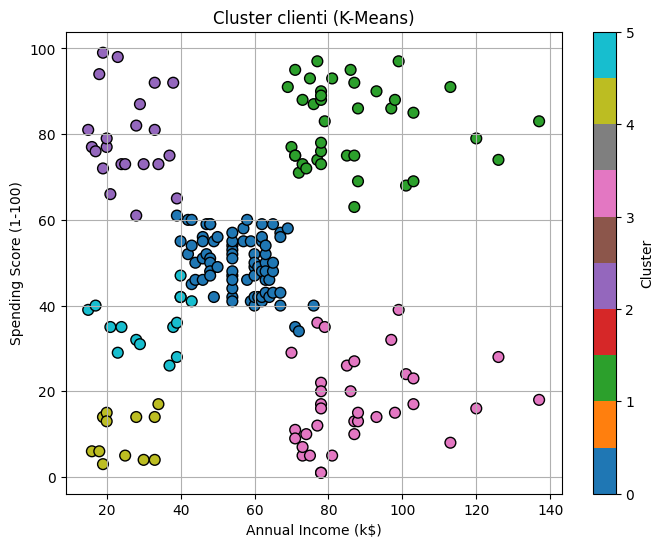

In [9]:
# visualizzazione 2D
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
scatter = plt.scatter(
    X["Annual Income (k$)"], 
    X["Spending Score (1-100)"], 
    c=labels, cmap='tab10', s=60, edgecolor='black'
)
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.title("Cluster clienti (K-Means)")
plt.grid(True)
plt.colorbar(scatter, label="Cluster")
plt.show()

### Possiamo dire che il modello sembra diversificare e raggruppare bene i vari tipi di clienti, basso annual income e bassso spending score (giallo), alto annual income ma basso spending score (rosa), e cosi via... dividendo in tre fasce l'annual income e in tre fasce lo spending score !!

In [15]:
# Trova il cluster ad alto potenziale
# Individua il cluster con i valori più alti sia di Annual Income che Spending Score 
cluster_summary["potenziale"] = cluster_summary["Annual Income (k$)"] + cluster_summary["Spending Score (1-100)"]
high_potential = cluster_summary.sort_values(by="potenziale", ascending=False).head(1)
print("\nCluster ad alto potenziale (somma reddito + score):")
print(high_potential)


Cluster ad alto potenziale (somma reddito + score):
          Annual Income (k$)  Spending Score (1-100)  potenziale
Clusters                                                        
1                  86.538462               82.128205  168.666667
